In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches


**Definición de la Clase `Escena`**

In [16]:
class Escena:
    def __init__(self, radio=5, color='darkblue'):

        #Inicia la escena con un círculo y puntos representando ojos.

        self.radio = radio
        self.color = color
        self.puntos = np.array([[-1.5, 2], [1.5, 2]])  # Posiciones de los ojos

    def dibujar_escena(self):

        #Dibuja la escena con el círculo y los puntos.

        fig, ax = plt.subplots()
        ax.set_xlim(-self.radio - 3, self.radio + 3)
        ax.set_ylim(-self.radio - 3, self.radio + 3)
        ax.axhline(0, color='black', linewidth=1)
        ax.axvline(0, color='black', linewidth=1)
        circle = patches.Circle((0, 0), self.radio, color=self.color, fill=False)
        ax.add_patch(circle)
        ax.scatter(self.puntos[:, 0], self.puntos[:, 1], color='red', s=100)
        plt.gca().set_aspect('equal', adjustable='datalim')
        plt.grid(True)
        plt.show()

    def escalar(self, factor):

        #Escala el círculo y los puntos.

        self.radio *= factor
        self.puntos *= factor

    def desplazar(self, dx, dy):
        """
        Desplaza los puntos.
        """
        self.puntos += np.array([dx, dy])

    def rotar(self, angulo):

        #Rota los puntos un cierto ángulo en grados alrededor del origen.

        theta = np.radians(angulo)
        rot_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                               [np.sin(theta), np.cos(theta)]])
        self.puntos = self.puntos @ rot_matrix.T

    def rotacion_masiva(self, vector_rotaciones):

        #Aplica múltiples rotaciones en secuencia.

        for angulo in vector_rotaciones:
            self.rotar(angulo)

    def desplazamiento_masivo(self, desplazamientos):

        #Aplica múltiples desplazamientos en secuencia.

        for dx, dy in desplazamientos:
            self.desplazar(dx, dy)

    def transformaciones_masivas(self, operaciones):

        #Aplica una combinación de rotaciones y desplazamientos.

        for operacion in operaciones:
            if isinstance(operacion[1], str):
                self.rotar(operacion[0])
            elif isinstance(operacion[1], (int, float)):
                self.desplazar(operacion[0], operacion[1])

**Experimentos**

Escena original


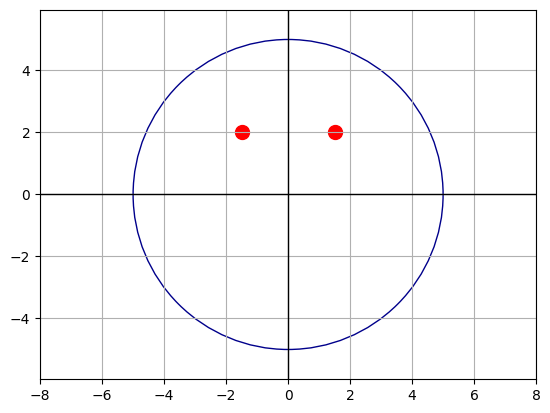

Rotación masiva: [45, 30]


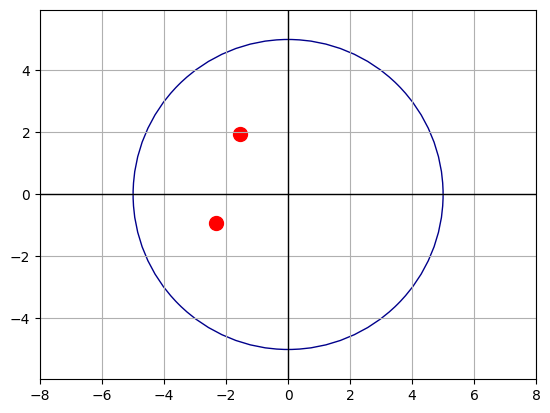

Desplazamiento masivo: [(2, 1), (-1, -1)]


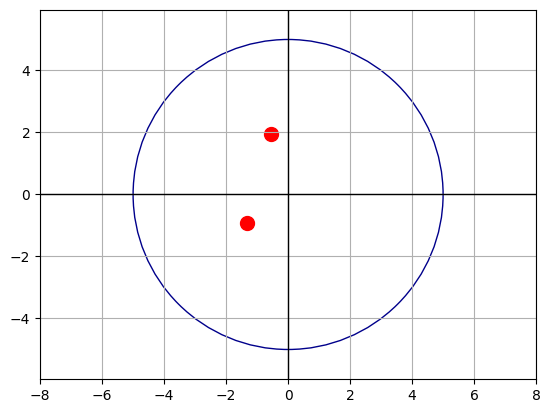

Transformaciones masivas: [(30, 'rotacion'), (1, 1)]


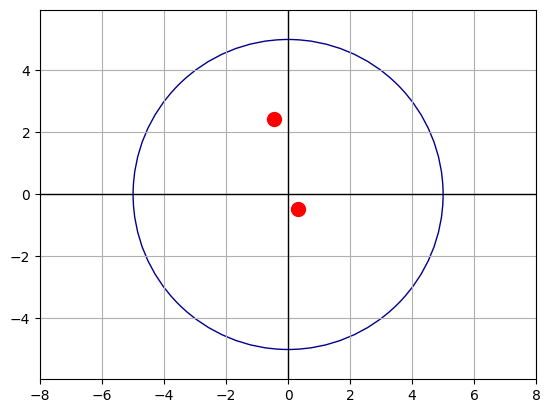

In [17]:

escena = Escena()
print("Escena original")
escena.dibujar_escena()

print("Rotación masiva: [45, 30]")
escena.rotacion_masiva([45, 30])
escena.dibujar_escena()

print("Desplazamiento masivo: [(2, 1), (-1, -1)]")
escena.desplazamiento_masivo([(2, 1), (-1, -1)])
escena.dibujar_escena()

print("Transformaciones masivas: [(30, 'rotacion'), (1, 1)]")
escena.transformaciones_masivas([(30, 'rotacion'), (1, 1)])
escena.dibujar_escena()

-Los desplazamientos son conmutativos, ya que cambiar el orden de suma de vectores no altera la posición final.

-Las rotaciones NO son conmutativas, porque el orden en el que se aplican afecta la orientación final.
- **Ejemplo práctico:**
  - Desplazarse 2m a la derecha y luego 3m arriba es lo mismo que hacerlo en orden inverso.
  - Girar 30° y luego 45° NO es lo mismo que girar 45° y luego 30°, ya que la referencia cambia con cada rotación.
